<h1 style="color:black;">1. Drop Unnecessary Columns</h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Customer-Churn-Records.csv")
df.rename(columns={"Exited": "Churn"}, inplace=True)
df.drop(columns=["RowNumber", "CustomerId", "Surname", "Complain"], inplace=True)

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
binary_columns = ["Exited", "Complain", "HasCrCard", "IsActiveMember", "Churn"] 
num_columns = [col for col in numeric_columns if col not in binary_columns]


df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,GOLD,425


In [2]:
df.info

<bound method DataFrame.info of       CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember

<h1 style="color:black;">2. Label Encode Gender</h1>

In [3]:
df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Satisfaction Score,Card Type,Point Earned
0,619,France,1,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0,3,DIAMOND,456
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377
3,699,France,1,39,1,0.00,2,0,0,93826.63,0,5,GOLD,350
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0,5,GOLD,425


<h1 style="color:black;">3. Ordinal Encode Card Type</h1>

In [4]:
from sklearn.preprocessing import OrdinalEncoder
card_type_order = [["SILVER", "GOLD", "PLATINUM", "DIAMOND"]]

# Apply ordinal encoding
ordinal_encoder = OrdinalEncoder(categories=card_type_order)
df["Card Type"] = ordinal_encoder.fit_transform(df[["Card Type"]])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Satisfaction Score,Card Type,Point Earned
0,619,France,1,42,2,0.00,1,1,1,101348.88,1,2,3.0,464
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0,3,3.0,456
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1,3,3.0,377
3,699,France,1,39,1,0.00,2,0,0,93826.63,0,5,1.0,350
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0,5,1.0,425


<h1 style="color:black;">4. One-Hot Encode Geography</h1>

In [5]:
# One-Hot Encoding for Geography (drop_first=True to avoid multicollinearity)
df = pd.get_dummies(df, columns=["Geography"], drop_first=True)


In [6]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Satisfaction Score,Card Type,Point Earned,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,2,3.0,464,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,3,3.0,456,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,3,3.0,377,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,5,1.0,350,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,5,1.0,425,0,1


<h1 style="color:black;">5. Identify Outliers</h1>

Updated Outliers per feature (excluding binary variables):
 CreditScore            15
Age                   359
Tenure                  0
Balance                 0
NumOfProducts          60
EstimatedSalary         0
Satisfaction Score      0
Point Earned            0
dtype: int64


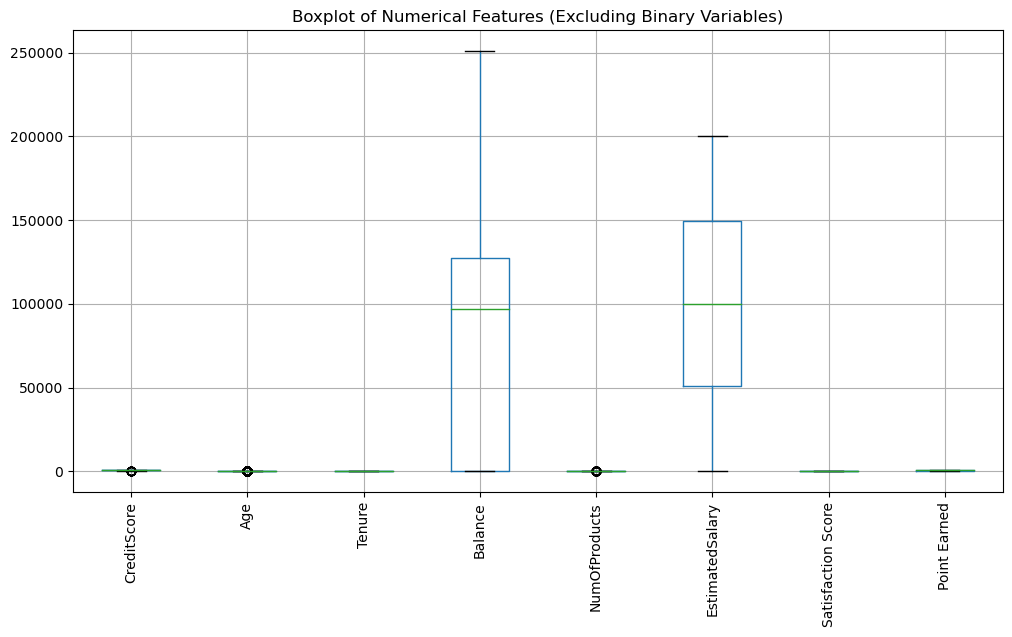

In [7]:
Q1 = df[num_columns].quantile(0.25)
Q3 = df[num_columns].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_counts = ((df[num_columns] < lower_bound) | (df[num_columns] > upper_bound)).sum()
print("Updated Outliers per feature (excluding binary variables):\n", outlier_counts)

plt.figure(figsize=(12,6))
df[num_columns].boxplot(rot=90)
plt.title("Boxplot of Numerical Features (Excluding Binary Variables)")
plt.show()


<h1 style="color:black;">6. Apply Winsorization</h1>

In [8]:
features_with_outliers = ["CreditScore", "Age", "NumOfProducts"]  # Exclude EstimatedSalary

df[features_with_outliers] = df[features_with_outliers].clip(lower=lower_bound[features_with_outliers], 
                                                             upper=upper_bound[features_with_outliers], axis=1)

outlier_counts_after = ((df[features_with_outliers] < lower_bound[features_with_outliers]) | 
                        (df[features_with_outliers] > upper_bound[features_with_outliers])).sum()
print("Outliers per feature after capping:\n", outlier_counts_after)


Outliers per feature after capping:
 CreditScore      0
Age              0
NumOfProducts    0
dtype: int64


<h1 style="color:black;">7. Feature Scaling</h1>

In [11]:
from sklearn.preprocessing import StandardScaler

numeric_columns = ["CreditScore", "Age", "NumOfProducts", "EstimatedSalary", "Balance", "Point Earned", "Tenure"]
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

processed_file_path = "Customer-Churn-Records-Processed-Ordinal-Scaled.csv"
df.to_csv(processed_file_path, index=False)

df.head()


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Satisfaction Score,Card Type,Point Earned,Geography_Germany,Geography_Spain
0,-0.326878,1,0.342615,-1.041760,-1.225848,-0.924827,1,1,0.021886,1,2,3.0,-0.630839,0,0
1,-0.440804,1,0.240011,-1.387538,0.117350,-0.924827,0,1,0.216534,0,3,3.0,-0.666251,0,1
2,-1.538636,1,0.342615,1.032908,1.333053,2.583620,1,0,0.240687,1,3,3.0,-1.015942,0,0
3,0.501675,1,0.034803,-1.387538,-1.225848,0.829397,0,0,-0.108918,0,5,1.0,-1.135457,0,0
4,2.065569,1,0.445219,-1.041760,0.785728,-0.924827,1,1,-0.365276,0,5,1.0,-0.803472,0,1


<h1 style="color:black;">8. Save Raw, Encoded Only, and Scaled with Encoding Datasets</h1>

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

file_path = "Customer-Churn-Records.csv"
df = pd.read_csv(file_path)

df.drop(columns=["RowNumber", "CustomerId", "Surname", "Complain"], inplace=True)
df.rename(columns={"Exited": "Churn"}, inplace=True)

df_raw = df.copy()

df_raw.to_csv("Customer-Churn-Records-Raw.csv", index=False)

df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})

card_type_order = ["SILVER", "GOLD", "PLATINUM", "DIAMOND"]
ordinal_encoder = OrdinalEncoder(categories=[card_type_order])
df["Card Type"] = ordinal_encoder.fit_transform(df[["Card Type"]])

df_encoded = pd.get_dummies(df, columns=["Geography"], drop_first=True)

df_encoded.to_csv("Customer-Churn-Records-Encoded-NoScaling.csv", index=False)


In [13]:
df_encoded.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Satisfaction Score,Card Type,Point Earned,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,2,3.0,464,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,3,3.0,456,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,3,3.0,377,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,5,1.0,350,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,5,1.0,425,0,1


In [14]:
df_raw.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,GOLD,425
